# Importing of basic libraries


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import json
import nltk
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Cleaning of dataset

In [2]:
games = pd.read_csv('appstore_games.csv')

In [3]:
games_full = games[['Name', 'Average User Rating', 'User Rating Count', 'Price', 'In-app Purchases', 'Developer', 'Age Rating', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date']]
#games_full

### Criteria of a "successful game'
- game must have:
- user rating count > 4000
- average user rating =>4

In [4]:
### sort the successful and unsuccessful games based on criteria
# sort the games by user rating count in descending order
games_full = games_full.sort_values('User Rating Count', ascending=False)

games_full['success'] = np.nan

for row in range(len(games_full)):
    success = (games_full['User Rating Count'][row] >= 4000 and
              games_full['Average User Rating'][row] >= 4.0)
    
    if success:
        games_full['success'][row] = 1
    else:
        games_full['success'][row] = 0

games_full= games_full.reset_index()
games_full = games_full.drop('index', axis=1)  

games_full['Average User Rating'] = games_full['Average User Rating'].fillna(0)
games_full['User Rating Count'] = games_full['User Rating Count'].fillna(0)
games_full['In-app Purchases'] = games_full['In-app Purchases'].fillna(0)
games_full['Price'] = games_full['Price'].fillna(0)
        
games_full


,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Genres,Original Release Date,Current Version Release Date,success
0,Clash of Clans,4.5,3032734.0,0.0,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...",Supercell,9+,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB...","Games, Action, Entertainment, Strategy",2/08/2012,20/06/2019,1.0
1,Clash Royale,4.5,1277095.0,0.0,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....",Supercell,9+,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH...","Games, Strategy, Entertainment, Action",2/03/2016,1/08/2019,1.0
2,PUBG MOBILE,4.5,711409.0,0.0,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",Tencent Mobile International Limited,17+,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR","Games, Action, Strategy",19/03/2018,12/06/2019,1.0
3,Plants vs. Zombies\u2122 2,4.5,469562.0,0.0,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...",PopCap,9+,"EN, FR, DE, IT, PT, ES","Games, Strategy, Entertainment, Adventure",15/08/2013,29/07/2019,1.0
4,Pok\xe9mon GO,3.5,439776.0,0.0,"0.99, 4.99, 9.99, 19.99, 39.99, 99.99","Niantic, Inc.",9+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH","Games, Strategy, Role Playing, Health & Fitness",7/07/2016,2/08/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17002,Stack Puzzle : Rise Tower,0.0,0.0,0.0,0,Zhigang Pei,4+,EN,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019,0.0
17003,EachOther,0.0,0.0,0.0,0,Sultan Shindi,4+,EN,"Games, Family, Strategy",1/08/2019,1/08/2019,0.0
17004,Rabbit Vs Tortoise,0.0,0.0,0.0,0,Vishal Baldha,4+,EN,"Games, Strategy",3/08/2019,3/08/2019,0.0
17005,FaTaLL,0.0,0.0,0.0,"9.99, 49.99, 3.99",Tayrem Games,4+,EN,"Games, Strategy, Action",1/08/2019,1/08/2019,0.0


In [5]:
# Create Seperate df of successful and non successful game
# create a boolean mask for the "unsuccessful" game
unsuccess = (games_full["success"] == 0)

# create a new dataframe for unsuccessful games
unsuccess = games_full[unsuccess]

# create a boolean mask for the "successful" game
success = (games_full["success"] == 1)

# create a new dataframe for successful games
games_clean = games_full[success]


In [6]:

games_clean= games_clean.reset_index()
games_clean = games_clean.drop('index', axis=1)
games_clean

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Genres,Original Release Date,Current Version Release Date,success
0,Clash of Clans,4.5,3032734.0,0.00,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...",Supercell,9+,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB...","Games, Action, Entertainment, Strategy",2/08/2012,20/06/2019,1.0
1,Clash Royale,4.5,1277095.0,0.00,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....",Supercell,9+,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH...","Games, Strategy, Entertainment, Action",2/03/2016,1/08/2019,1.0
2,PUBG MOBILE,4.5,711409.0,0.00,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",Tencent Mobile International Limited,17+,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR","Games, Action, Strategy",19/03/2018,12/06/2019,1.0
3,Plants vs. Zombies\u2122 2,4.5,469562.0,0.00,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...",PopCap,9+,"EN, FR, DE, IT, PT, ES","Games, Strategy, Entertainment, Adventure",15/08/2013,29/07/2019,1.0
4,Boom Beach,4.5,400787.0,0.00,"4.99, 9.99, 19.99, 99.99, 49.99, 2.99, 0.99, 9.99",Supercell,9+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, MS, NB, PT...","Games, Strategy, Action",26/03/2014,3/07/2019,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
503,Evertale,4.5,4067.0,0.99,"23.99, 3.99, 11.99, 79.99, 39.99, 0.99",ZigZaGame Inc.,12+,"EN, FR, DE, IT, JA, KO, ZH, ES, ZH","Games, Strategy, Role Playing",21/03/2019,16/07/2019,1.0
504,Grow Empire: Rome,4.5,4027.0,0.00,"0.99, 2.99, 9.99, 4.99, 6.99, 14.99, 19.99, 24...",Station Game Studio SRL,9+,"CA, ZH, DA, NL, EN, FR, DE, HI, ID, IT, JA, KO...","Games, Strategy, Role Playing",1/09/2018,8/06/2019,1.0
505,Wild Beyond,4.0,4027.0,0.00,"1.99, 0.99, 1.99, 1.99, 9.99, 4.99, 9.99, 4.99...",Strange Sevens,12+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH","Games, Simulation, Entertainment, Strategy",19/11/2018,25/07/2019,1.0
506,Wild Beyond,4.0,4027.0,0.00,"1.99, 0.99, 1.99, 1.99, 9.99, 4.99, 9.99, 4.99...",Strange Sevens,12+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH","Games, Simulation, Entertainment, Strategy",19/11/2018,25/07/2019,1.0


### Remove rows with NA in their Average User Rating

In [7]:
games_clean = games_clean.dropna(subset=['Average User Rating'])
games_clean

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Genres,Original Release Date,Current Version Release Date,success
0,Clash of Clans,4.5,3032734.0,0.00,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...",Supercell,9+,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB...","Games, Action, Entertainment, Strategy",2/08/2012,20/06/2019,1.0
1,Clash Royale,4.5,1277095.0,0.00,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....",Supercell,9+,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH...","Games, Strategy, Entertainment, Action",2/03/2016,1/08/2019,1.0
2,PUBG MOBILE,4.5,711409.0,0.00,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",Tencent Mobile International Limited,17+,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR","Games, Action, Strategy",19/03/2018,12/06/2019,1.0
3,Plants vs. Zombies\u2122 2,4.5,469562.0,0.00,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...",PopCap,9+,"EN, FR, DE, IT, PT, ES","Games, Strategy, Entertainment, Adventure",15/08/2013,29/07/2019,1.0
4,Boom Beach,4.5,400787.0,0.00,"4.99, 9.99, 19.99, 99.99, 49.99, 2.99, 0.99, 9.99",Supercell,9+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, MS, NB, PT...","Games, Strategy, Action",26/03/2014,3/07/2019,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
503,Evertale,4.5,4067.0,0.99,"23.99, 3.99, 11.99, 79.99, 39.99, 0.99",ZigZaGame Inc.,12+,"EN, FR, DE, IT, JA, KO, ZH, ES, ZH","Games, Strategy, Role Playing",21/03/2019,16/07/2019,1.0
504,Grow Empire: Rome,4.5,4027.0,0.00,"0.99, 2.99, 9.99, 4.99, 6.99, 14.99, 19.99, 24...",Station Game Studio SRL,9+,"CA, ZH, DA, NL, EN, FR, DE, HI, ID, IT, JA, KO...","Games, Strategy, Role Playing",1/09/2018,8/06/2019,1.0
505,Wild Beyond,4.0,4027.0,0.00,"1.99, 0.99, 1.99, 1.99, 9.99, 4.99, 9.99, 4.99...",Strange Sevens,12+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH","Games, Simulation, Entertainment, Strategy",19/11/2018,25/07/2019,1.0
506,Wild Beyond,4.0,4027.0,0.00,"1.99, 0.99, 1.99, 1.99, 9.99, 4.99, 9.99, 4.99...",Strange Sevens,12+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH","Games, Simulation, Entertainment, Strategy",19/11/2018,25/07/2019,1.0


### Remove redundant words in Genre

In [8]:
## Remove "Genre" from Genre column
games_clean['Genres']=games_clean['Genres'].map(lambda x:x.lstrip('Games,'))
##Remove rows with no genres -- none got removed
games_clean = games_clean[~(games_clean["Genres"].str.len() == 0 )]
#games_clean

In [9]:
print(games_clean.loc[games_clean['Price'].isna()])


Empty DataFrame
Columns: [Name, Average User Rating, User Rating Count, Price, In-app Purchases, Developer, Age Rating, Languages, Genres, Original Release Date, Current Version Release Date, success]
Index: []


### Convert Original Release date 

In [10]:
games_clean["Original Release Date"].dtype

dtype('O')

In [11]:
### Convert Original Release date to int
games_clean["Original Release Date"]= games_clean['Original Release Date'].str.replace("/","-")
games_clean["Original Release Date"] = pd.to_datetime(games_clean["Original Release Date"]).dt.strftime('%Y-%m-%d')
#games_clean["Original Release Date"]
games_clean["Current Version Release Date"]= games_clean['Current Version Release Date'].str.replace("/","-")
games_clean["Current Version Release Date"] = pd.to_datetime(games_clean["Current Version Release Date"]).dt.strftime('%Y-%m-%d')

# Data Analysis

### 1.Splitting Genre column & its Distribution

In [12]:
## Remove any spacing 
games_clean["Genres"]= games_clean['Genres'].str.replace(" ","")
#games_clean["Genres"]

In [13]:
## Split Genre based on " , " into a new column "GenresList"
games_clean['GenresList'] = games_clean['Genres'].str.split(",")
#games_clean['GenresList']


In [14]:
explodeG = games_clean.explode("GenresList")
count = explodeG["GenresList"].value_counts().reset_index()
count.columns = ['Genre', 'Count']
count.head(5)

,Genre,Count
0,Strategy,508
1,Entertainment,289
2,Simulation,125
3,Action,124
4,RolePlaying,91


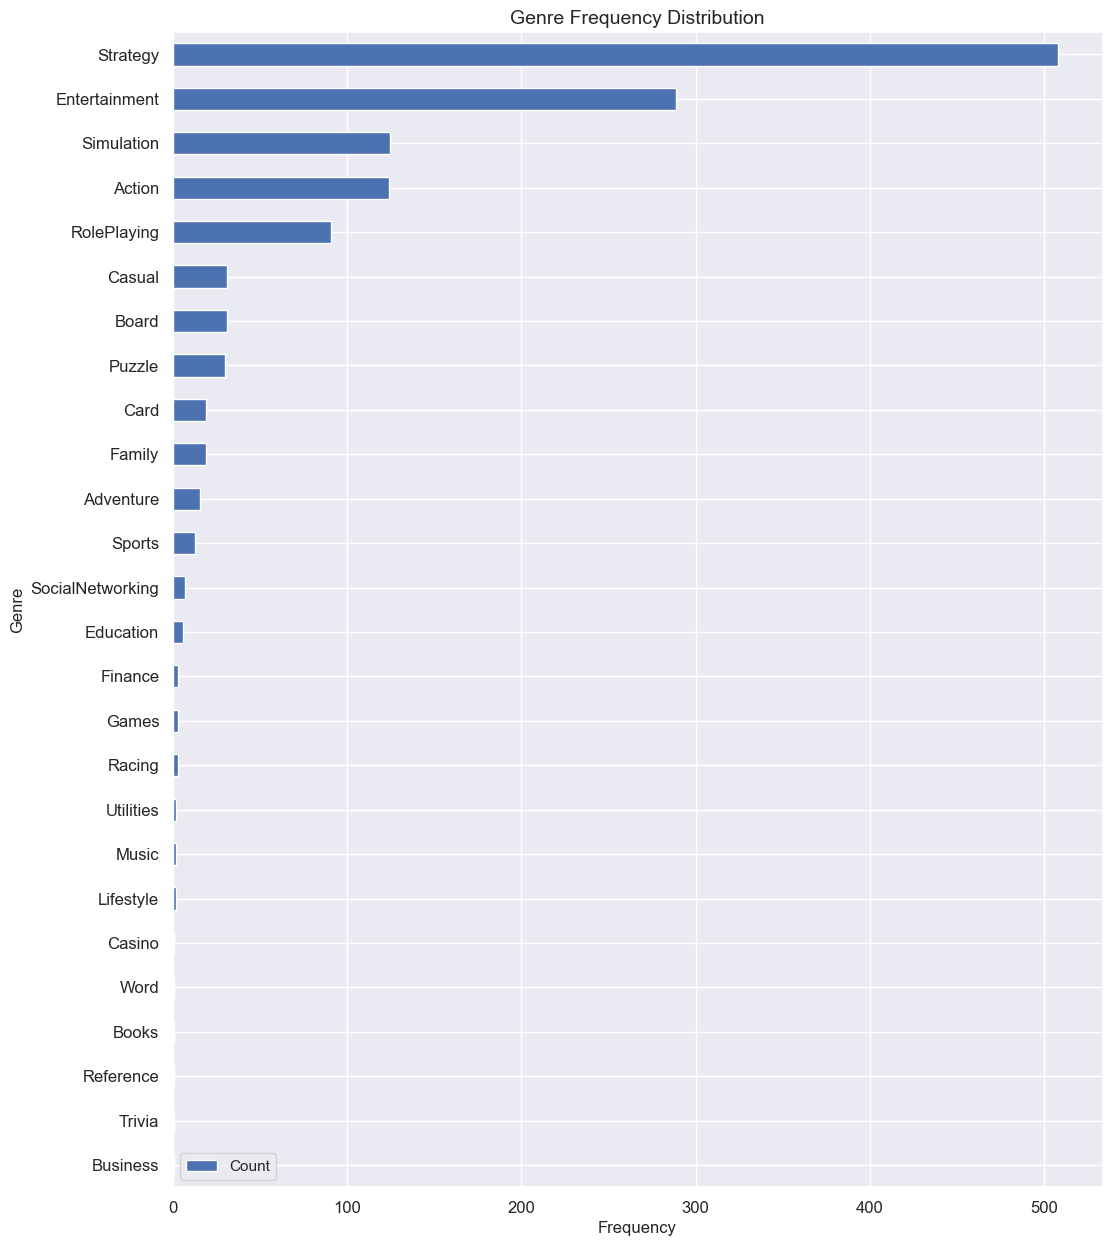

In [15]:
# create a horizontal bar chart of the genre frequencies
ax = count.plot(kind='barh', x='Genre', y='Count',  figsize=(12, 15))

# set the chart title and axis labels
ax.set_title('Genre Frequency Distribution', fontsize=14)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# set the x-axis tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# invert the y-axis to show the most common genres at the top
ax.invert_yaxis()

# display the chart
plt.show()


### Analysis
- Popular Genres: Entertainment; Action; Simulation
- Unpopular Genres: Business, Trivia, Reference, Books, Word, Casino

### 2.Splitting Language column & its Distribution 

In [16]:
games_clean["Languages"]= games_clean['Languages'].str.replace(" ","")
#games_clean["Languages"]

In [17]:
games_clean['LanguagesList'] = games_clean['Languages'].str.split(",")
#games_clean['LanguagesList']

In [18]:
explodeL = games_clean.explode("LanguagesList")
count = explodeL["LanguagesList"].value_counts().reset_index()
count.columns = ['Languages', 'Count']
count.head(5)

,Languages,Count
0,EN,504
1,ZH,381
2,FR,253
3,DE,253
4,ES,240


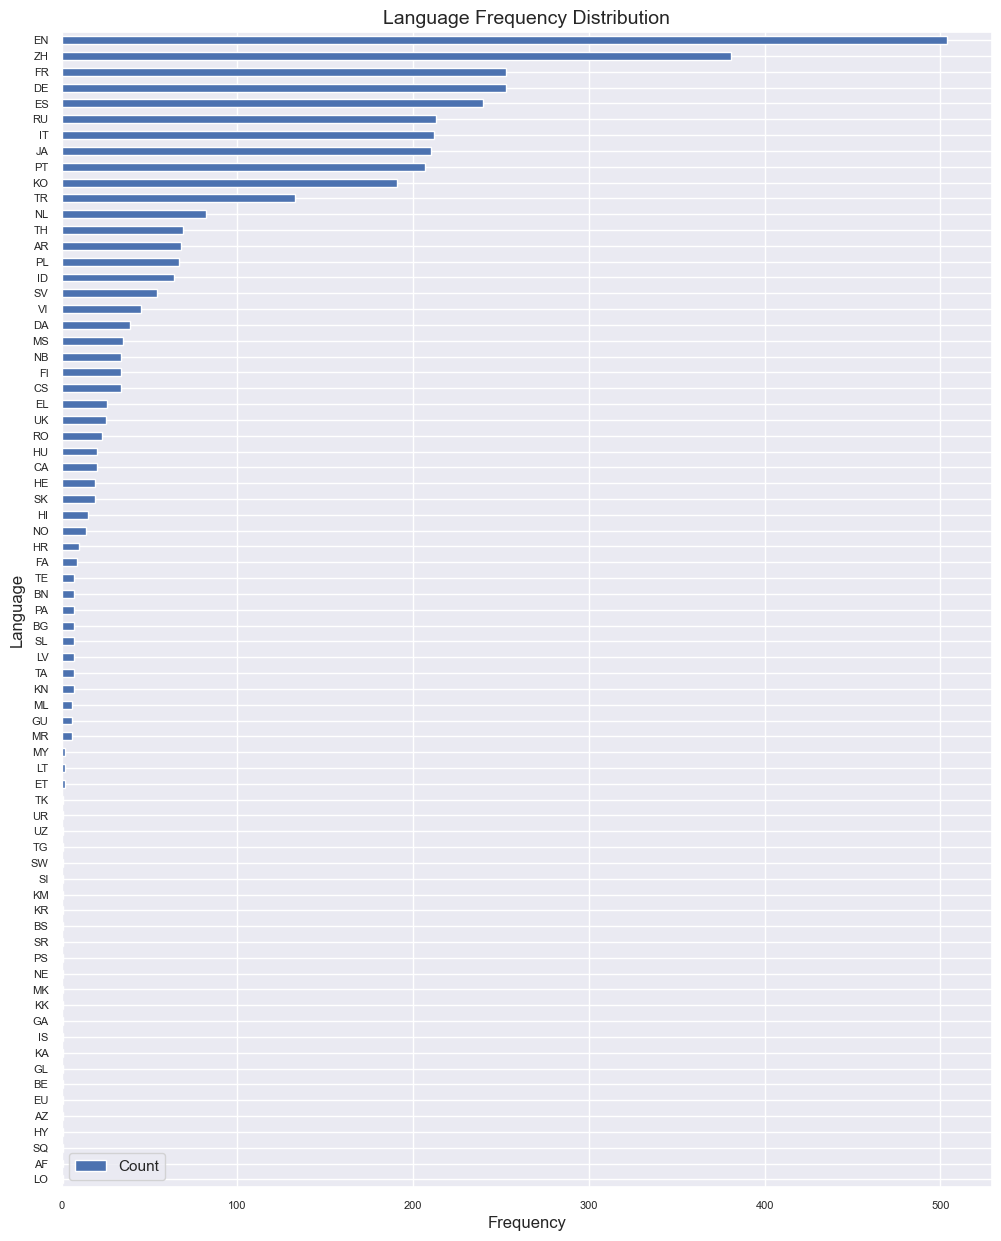

In [19]:
# create a horizontal bar chart of the language frequencies
ax = count.plot(kind='barh', x='Languages', y='Count',  figsize=(12, 15))

# set the chart title and axis labels
ax.set_title('Language Frequency Distribution', fontsize=14)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Language', fontsize=12)

# set the x-axis tick label font size
ax.tick_params(axis='both', which='major', labelsize=8)

# invert the y-axis to show the most common genres at the top
ax.invert_yaxis()

# display the chart
plt.show()

### Analysis
- EPopular Languages: English ; Chinese (ZH)

### 3.Distribution of Game Developers


In [20]:
developer = games_clean["Developer"].value_counts()
# Column names to be added
column_names=["Developer","Count"]
developer.columns = column_names

developer.head(10)

Ninja Kiwi                                    10
Tapps Tecnologia da Informa\xe7\xe3o Ltda.    10
Ironhide S.A.                                  8
Gameloft                                       7
Nordcurrent                                    7
Glu Games Inc                                  7
Green Panda Games                              6
Electronic Arts                                6
Fun Games For Free                             5
junghyun park                                  4
Name: Developer, dtype: int64

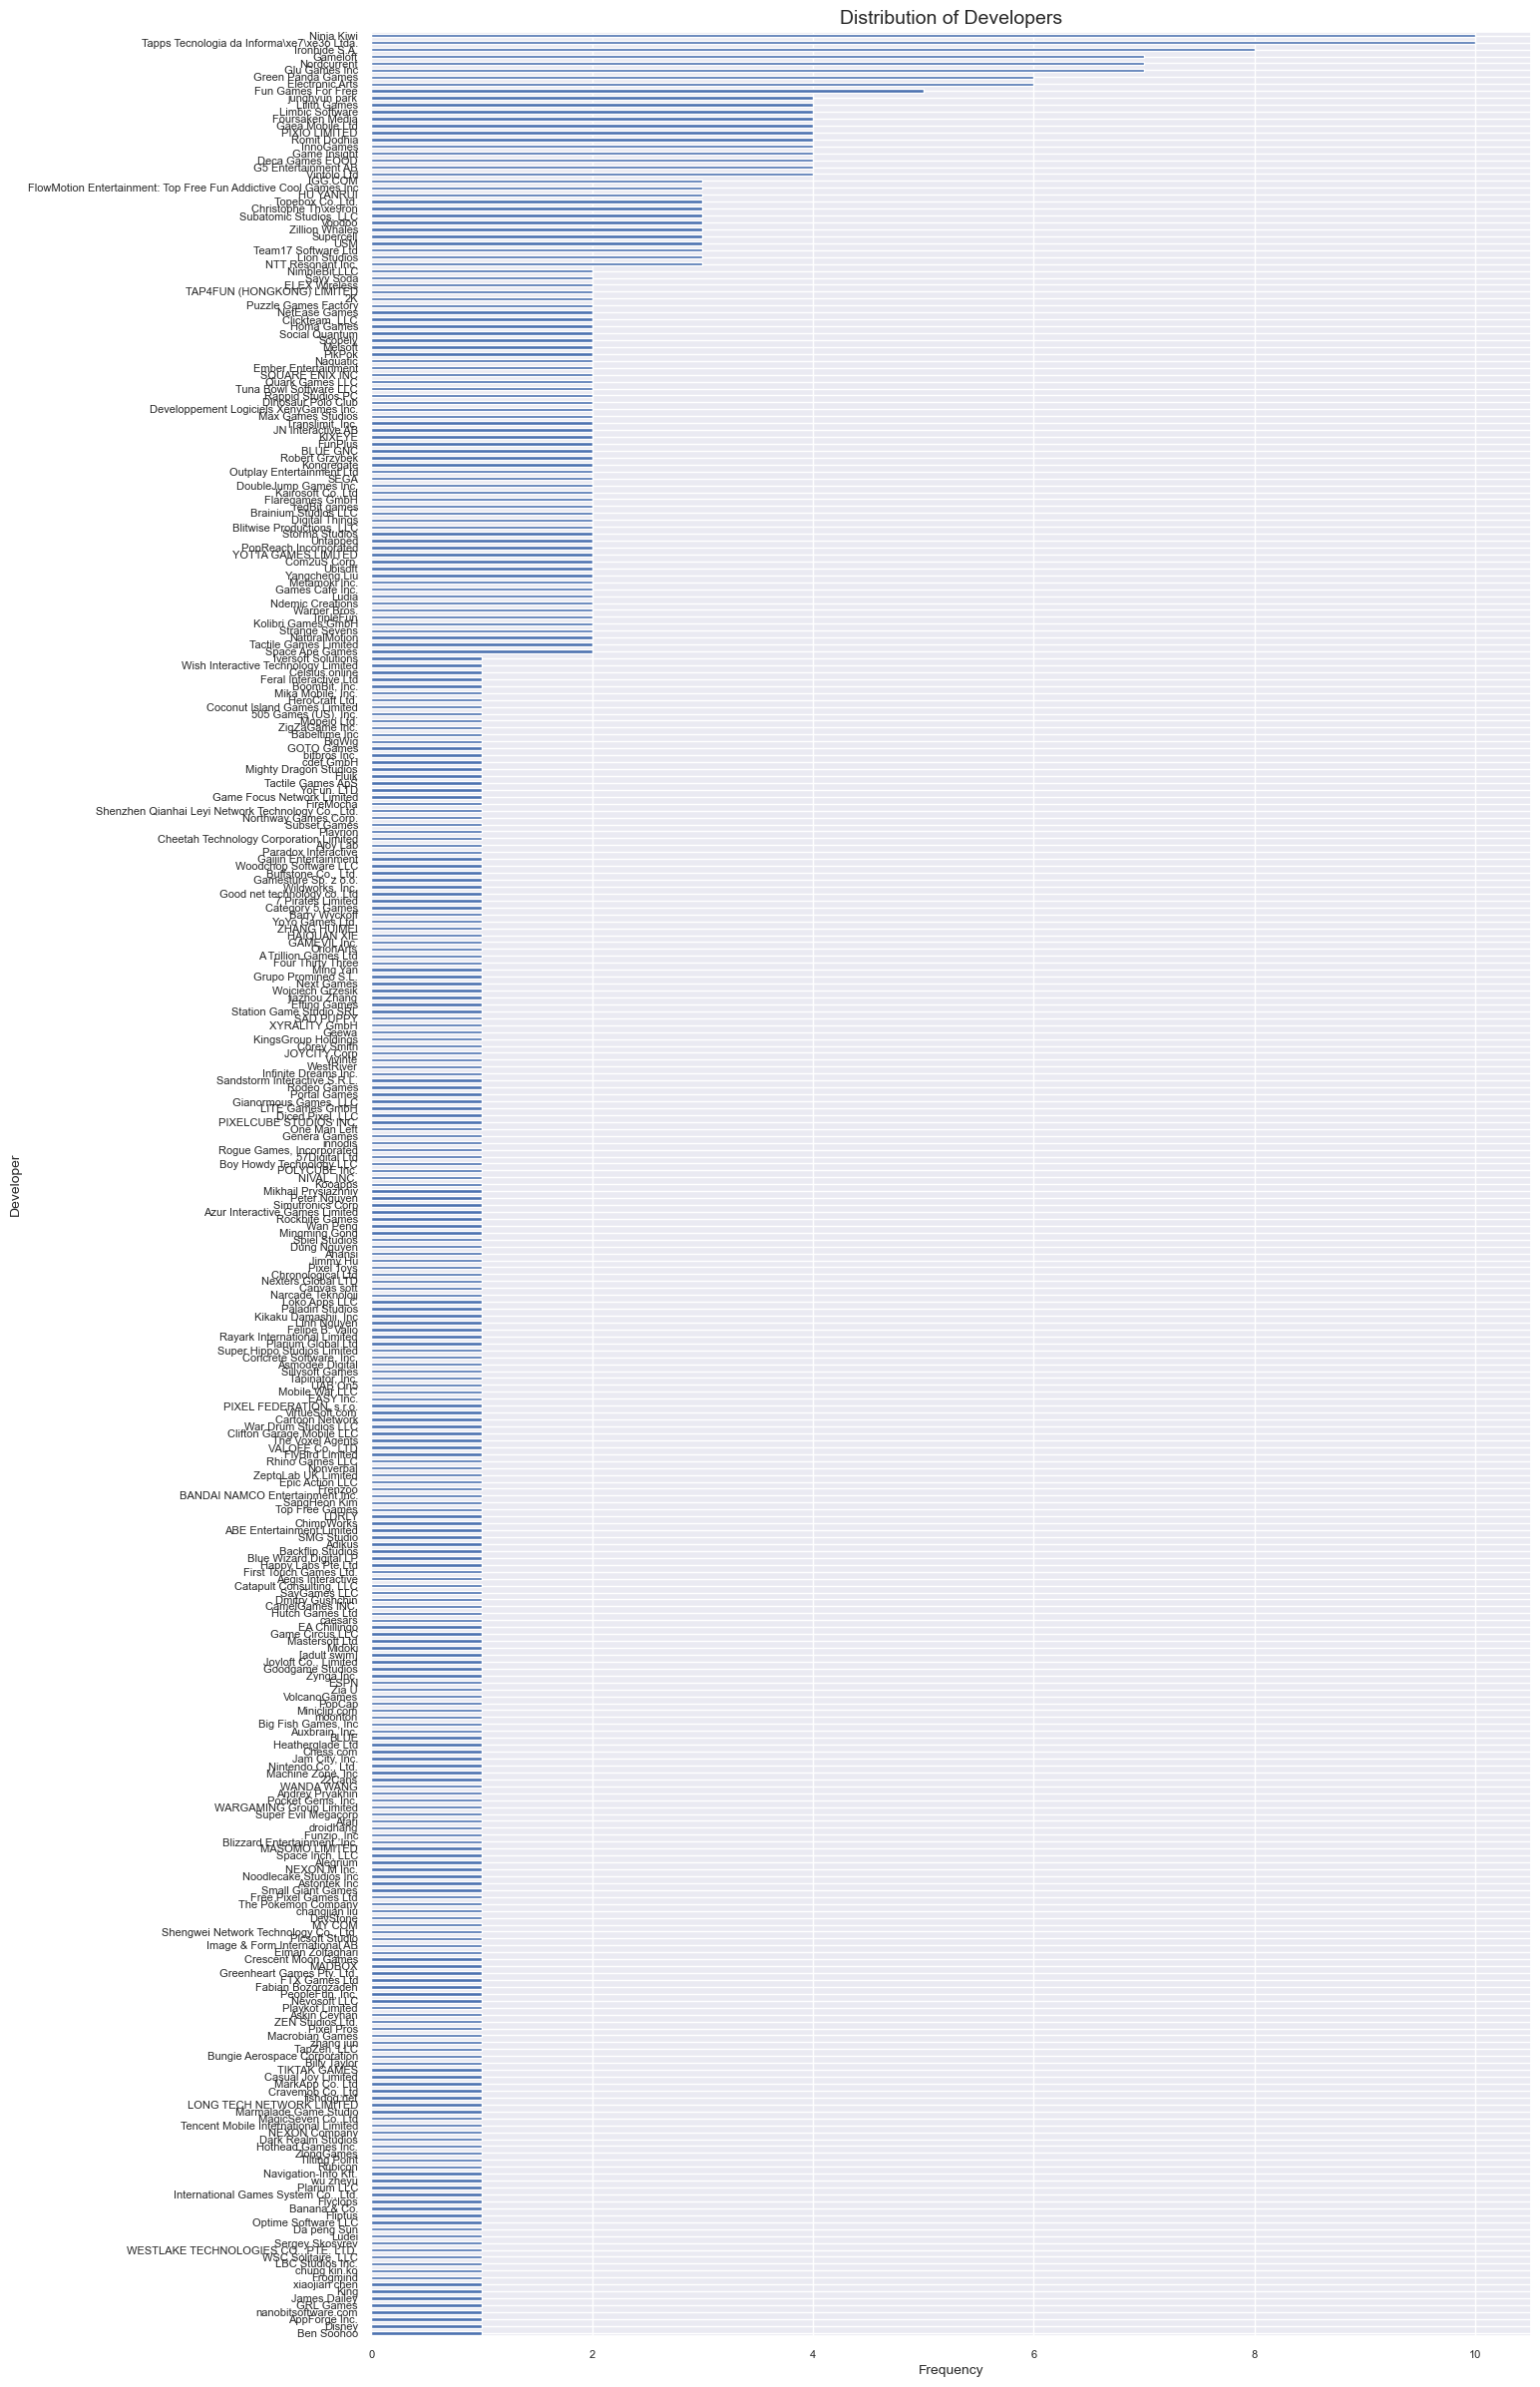

In [21]:
# create a horizontal bar chart of the developer frequencies
ax = developer.plot(kind='barh', x='Developer', y='Count',  figsize=(15, 30))

# set the chart title and axis labels
ax.set_title('Distribution of Developers', fontsize=14)
ax.set_xlabel('Frequency', fontsize=10)
ax.set_ylabel('Developer', fontsize=10)

# set the x-axis tick label font size
ax.tick_params(axis='both', which='major', labelsize=8)

# invert the y-axis to show the most common developer at the top
ax.invert_yaxis()

# display the chart
plt.show()

### Top 5 Game Developers

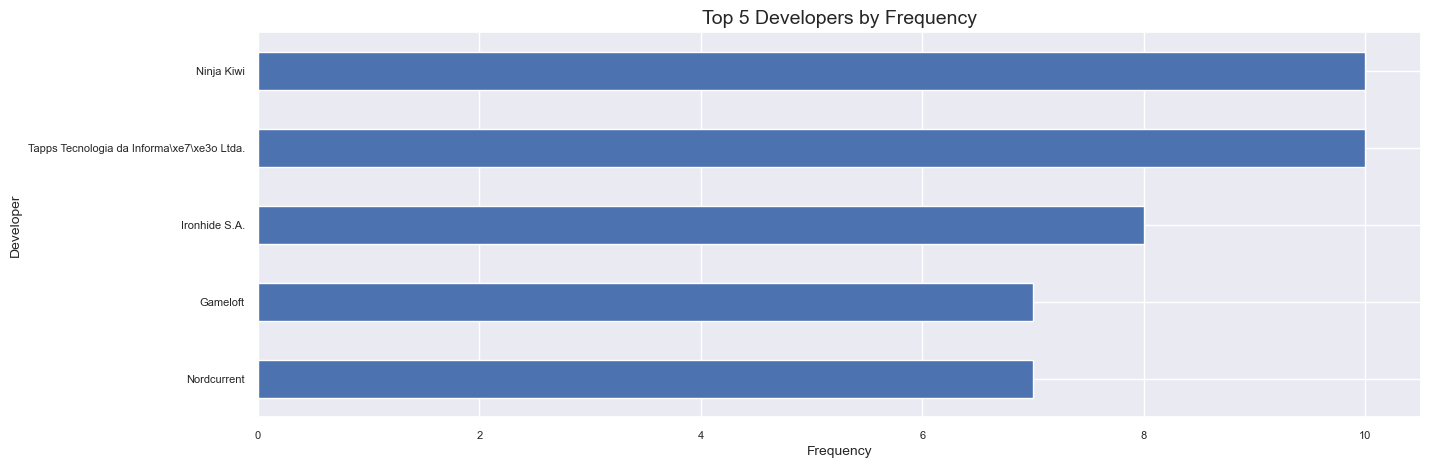

In [22]:
# sort the developer DataFrame by Count in descending order
#developer_sorted = developer.sort_values("Count", ascending=False)

# slice the top 5 rows
top_5_developers = developer.head(5)

# create a horizontal bar chart of the top 5 developers
ax = top_5_developers.plot(kind='barh', x='Developer', y='Count', figsize=(15, 5))

# set the chart title and axis labels
ax.set_title('Top 5 Developers by Frequency', fontsize=14)
ax.set_xlabel('Frequency', fontsize=10)
ax.set_ylabel('Developer', fontsize=10)

# set the x-axis tick label font size
ax.tick_params(axis='both', which='major', labelsize=8)

# invert the y-axis to show the most common developer at the top
ax.invert_yaxis()

# display the chart
plt.show()

### Analysis 
- Popular developers: Ninja Kiwi, Tapps Tec, Ironhide S.A
- The developer “Supercell”, although appeared 3 times in the top 500 games, developed games that are currently ranked 1, 2, 6. 


### New df of exploded genres and year of release

In [23]:
# create new df of exploded genres n ori release date
genretrend = explodeG[["GenresList", "Original Release Date"]].copy()
genretrend = genretrend.rename(columns ={'Original Release Date': 'year', 'GenresList': 'genre'})
genretrend


,genre,year
0,Action,2012-02-08
0,Entertainment,2012-02-08
0,Strategy,2012-02-08
1,Strategy,2016-02-03
1,Entertainment,2016-02-03
...,...,...
506,Entertainment,2018-11-19
506,Strategy,2018-11-19
507,Simulation,2015-09-05
507,Entertainment,2015-09-05


In [24]:
genretrend["year"] = pd.to_datetime(genretrend["year"])
#genretrend["year"].dtype
genretrend["year"]  = genretrend["year"].dt.strftime('%Y')
genretrend


,genre,year
0,Action,2012
0,Entertainment,2012
0,Strategy,2012
1,Strategy,2016
1,Entertainment,2016
...,...,...
506,Entertainment,2018
506,Strategy,2018
507,Simulation,2015
507,Entertainment,2015


In [25]:
genretrend = genretrend.groupby(['year', 'genre']).size().reset_index().rename(columns={0: 'count'})
genretrend

,year,genre,count
0,2008,Action,1
1,2008,Board,1
2,2008,Entertainment,2
3,2008,Strategy,2
4,2009,Action,6
...,...,...,...
141,2019,Entertainment,9
142,2019,Racing,1
143,2019,RolePlaying,6
144,2019,Simulation,14


### User Rating count vs Average user Rating based on Genre

In [26]:
genrerating = explodeG.groupby("GenresList")["Average User Rating"].describe()
genrerating

,count,mean,std,min,25%,50%,75%,max
GenresList,,,,,,,,
Action,124.0,4.512097,0.258700,4.0,4.500,4.50,4.500,5.0
Adventure,16.0,4.375000,0.288675,4.0,4.000,4.50,4.500,5.0
Board,31.0,4.403226,0.300537,4.0,4.000,4.50,4.500,5.0
Books,1.0,4.500000,NaN,4.5,4.500,4.50,4.500,4.5
Business,1.0,4.500000,NaN,4.5,4.500,4.50,4.500,4.5
Card,19.0,4.421053,0.301070,4.0,4.250,4.50,4.500,5.0
Casino,1.0,4.500000,NaN,4.5,4.500,4.50,4.500,4.5
Casual,31.0,4.500000,0.223607,4.0,4.500,4.50,4.500,5.0
Education,6.0,4.416667,0.204124,4.0,4.500,4.50,4.500,4.5


### Analysis
 - genres such as books, casino, health&fitness, music, navigation, and word may not be very accurate overall since they only have a small number of games released in this dataset.
 -  the overall average rating of all 508 games is 4.506
 - genres that have a sizeable number  of game and have a rating higher than the average are: Action, casual, education, family, finance, racing, and simulation

### Time series  - year vs user count, seperated by genres

In [27]:
# create a list for genres
genres_list = [genre for genre in set(genretrend['genre'])]

# create a new dataframe for as timeseries
column_names = ['year', 'total']
column_names.extend([genre for genre in genres_list])

newgenretrend = pd.DataFrame(columns=column_names)


## add in the values using for loop
for year in set(genretrend['year']):
    # get the total count for this year
    total_count = genretrend[genretrend['year'] == year]['count'].sum()
    
    # create a dictionary for this year
    single_year_row = {'year': [year], 'total': [total_count]}
        
    for genre in genres_list:
        # add the count for this genre
        count = genretrend[(genretrend['year'] == year) & (genretrend['genre'] == genre)]['count'].sum()
        single_year_row[genre] = [count]
    
    
    # add to dataframe
    newgenretrend = newgenretrend.append(pd.DataFrame(single_year_row), ignore_index=True)
    
    # calculate the proportion for each genre game
    
    for genre in genres_list:
        newgenretrend.loc[newgenretrend['year'] == year, genre] /= total_count

### Genre Trend graph -- num of games released vs year -- based on genres

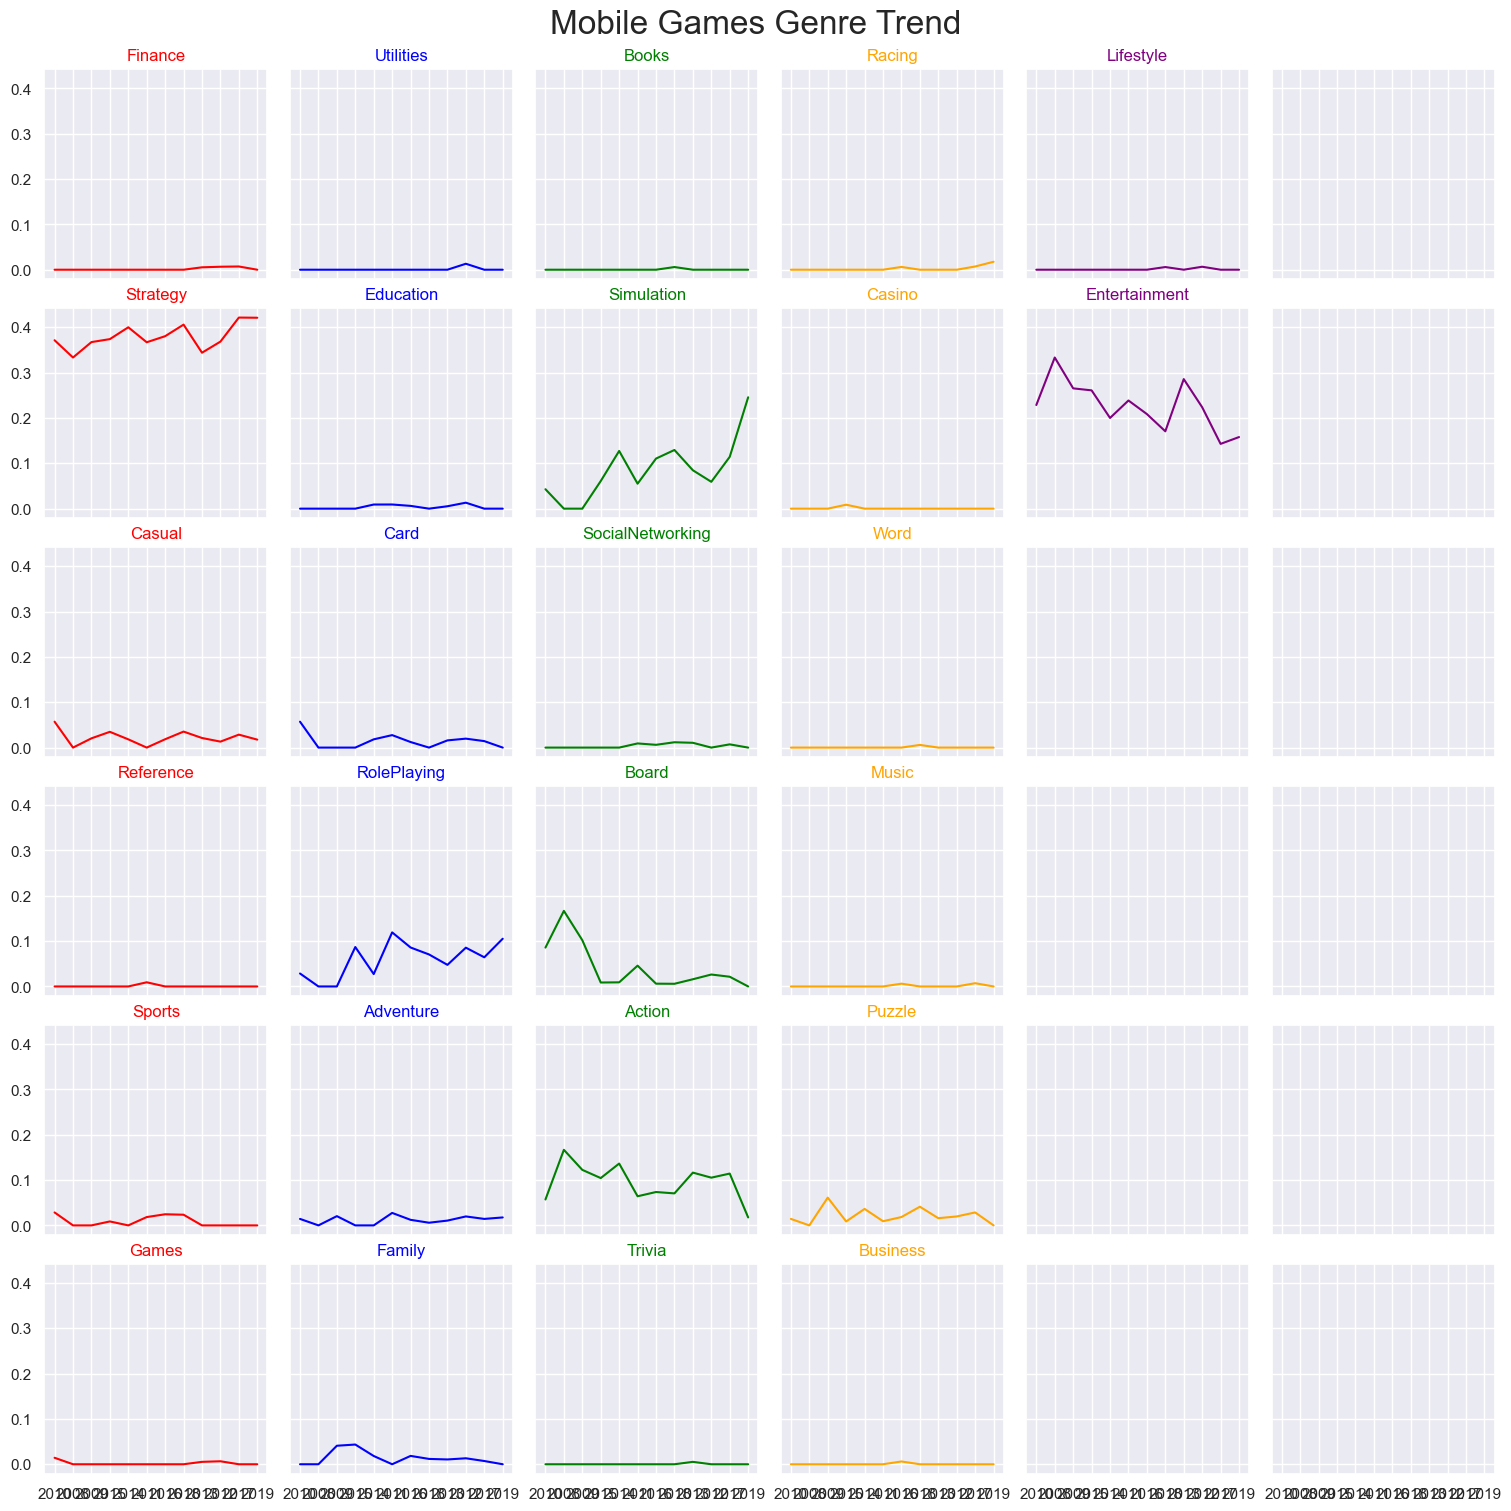

In [28]:
# use seaborn style
sb.set_theme()
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(6, 6, figsize=(15, 15), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle('Mobile Games Genre Trend', fontsize=24)

x_index = 0
y_index = 0

genres_list = list(newgenretrend.columns)[2:]

for genre in genres_list:
    # plot line graph
    axs[x_index, y_index].plot('year', genre, data=newgenretrend, color=colors[y_index])
    axs[x_index, y_index].set_title(f'{genre}', color=colors[y_index])
    
    # subplot ordering
    x_index += 1
    if x_index > 5:
        x_index -= 6
        y_index += 1
        

# show the graph
plt.show()

#### Analysis
- Action genre games have a constant gradual increase over the years
- Entertainment, Simulation, and Roleplaying games seems to be on a declining trend




### User Rating Count vs Average Rating based on Genres

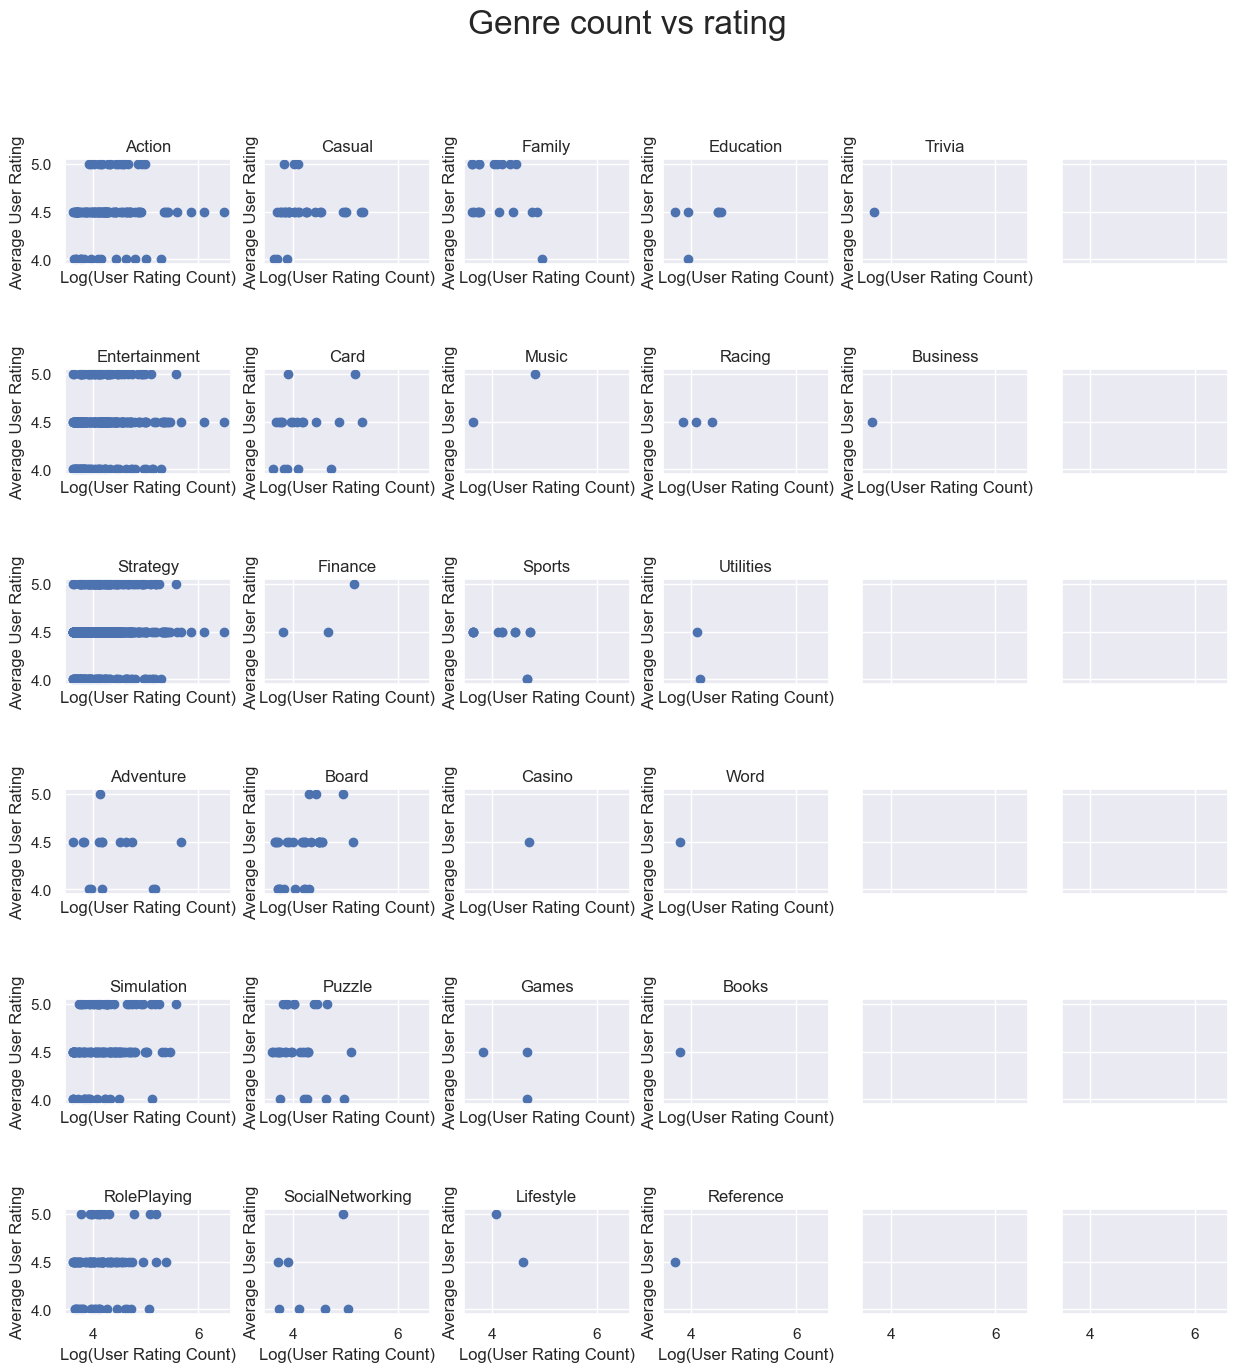

In [29]:
# create a list of unique genres
genres = list(explodeG['GenresList'].unique())

# create a figure with subplots for each genre
fig, axs = plt.subplots(6, 6, figsize=(15, 15), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle('Genre count vs rating', fontsize=24)

x_index = 0
y_index = 0

# loop through each genre and plot the log of user rating count vs average user rating
for i, genre in enumerate(genres):
    # get the data for the current genre
    data = explodeG[explodeG['GenresList'] == genre]
    
    # log transform the user rating count
    x = np.log10(data['User Rating Count'])
    
    # plot the data on the current subplot
    axs[x_index, y_index].scatter(x, data['Average User Rating'])
    
    # set the title and axis labels for the current subplot
    axs[x_index, y_index].set_title(genre)
    axs[x_index, y_index].set_xlabel('Log(User Rating Count)')
    axs[x_index, y_index].set_ylabel('Average User Rating')
    
    # subplot ordering
    x_index += 1
    if x_index > 5:
        x_index = 0
        y_index += 1
    
# adjust the spacing between subplots
fig.subplots_adjust(hspace=1)

# show the plot
plt.show()

### Analysis
- The genres Action and Entertainment seems to have games with high user rating count with relatively high user rating of 4.5 .
- Games with Card or Adventure genre, although have lesser games, have an overall high user rating, with only having 1 game from each genre in the low ratings.


## User Rating Count vs ....

### User Rating Count vs Price

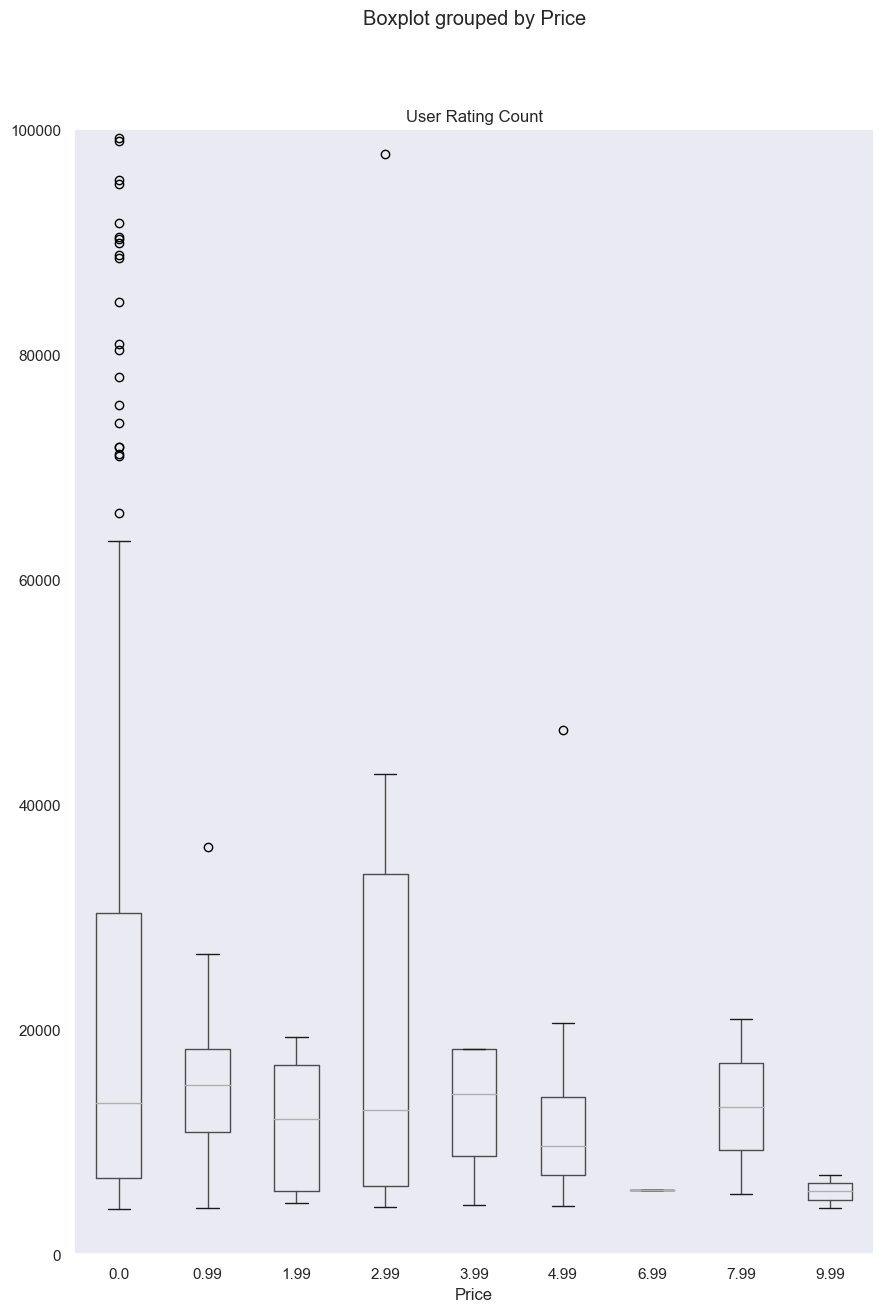

In [30]:
fig, ax = plt.subplots(figsize=(10,15))
games_clean.boxplot(by='Price', column=['User Rating Count'], grid=False, ax=ax)
#shows the whole boxplot inc. the very outliers
#ax.set_ylim(0, 3500000) # set the y-axis limits

#limit the y-axis so that the boxplot is shown better
ax.set_ylim(0, 100000) 
plt.show()

In [31]:
pricecount = games_clean.groupby("Price")["User Rating Count"].describe()
pricecount

,count,mean,std,min,25%,50%,75%,max
Price,,,,,,,,
0.00,438.0,43289.374429,167376.097907,4025.0,6754.75,13445.5,30354.50,3032734.0
0.99,14.0,28948.214286,51343.598067,4067.0,10841.75,15071.0,18217.75,205014.0
1.99,8.0,11579.625000,5951.909536,4512.0,5579.75,12013.5,16817.75,19322.0
2.99,19.0,21542.789474,23283.375215,4168.0,6097.00,12830.0,33756.50,97776.0
3.99,4.0,12773.500000,6767.906643,4349.0,8768.00,14246.5,18252.00,18252.0
4.99,20.0,12373.400000,9508.457523,4305.0,7012.75,9637.5,13940.50,46634.0
6.99,1.0,5755.000000,NaN,5755.0,5755.00,5755.0,5755.00,5755.0
7.99,2.0,13124.500000,11028.744466,5326.0,9225.25,13124.5,17023.75,20923.0
9.99,2.0,5593.000000,2060.509160,4136.0,4864.50,5593.0,6321.50,7050.0


### Analysis 
- the top 500 games is mostly free games ( 430 out of 500 are free)
- Games within the price range of 0.00 and 0.99 have high user rating count
- Games with $0.99 price on average(median) has a higher user rating count compared to free games
- Games with price range of 3.99 and above seems to be lower (in terms of games produced) and have a lower user rating count
- mean value should not be taken at face value esp for free games since it is most likely inarrcurate due to the extreme outliers

### User Rating Count vs Age Rating 

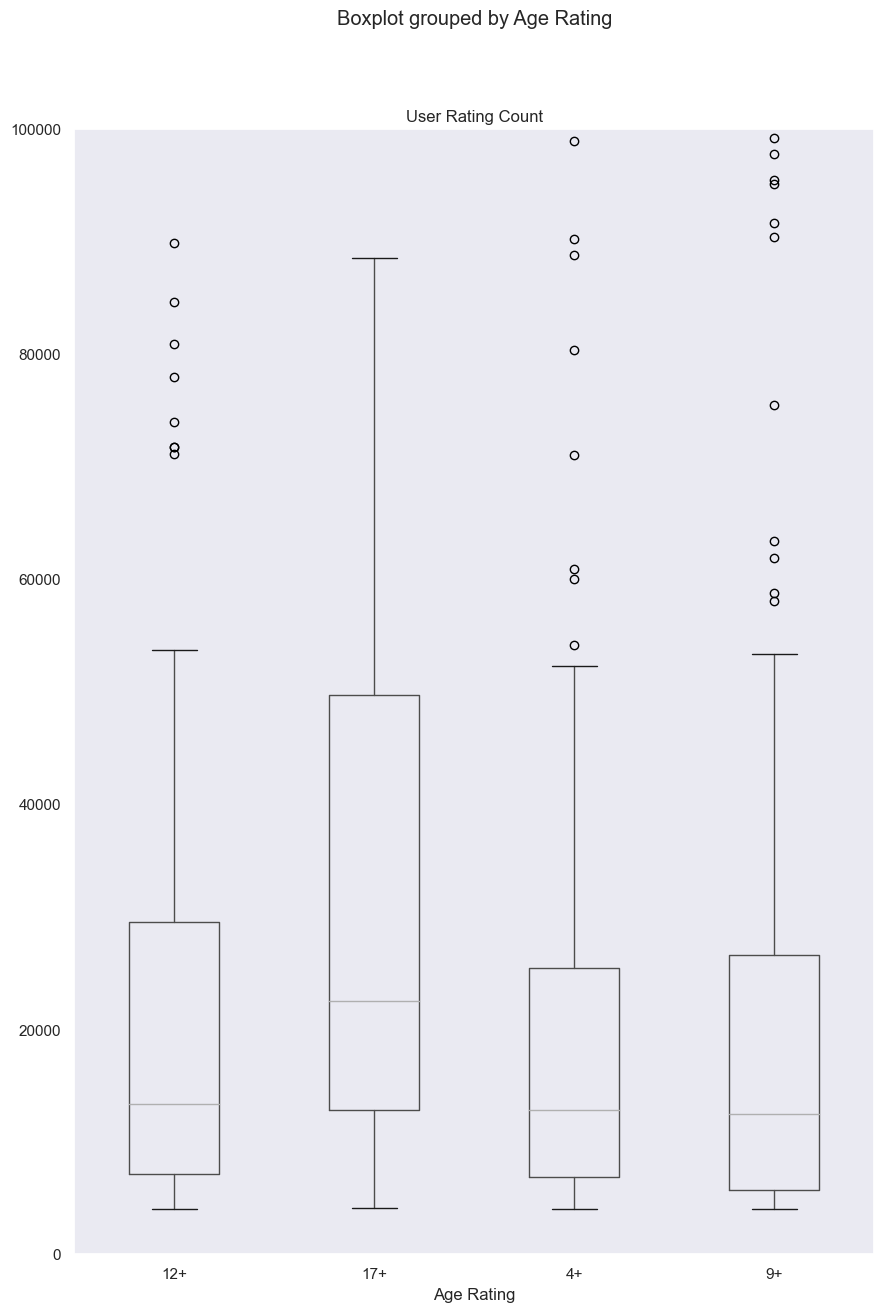

In [32]:
fig, ax = plt.subplots(figsize=(10,15))
games_clean.boxplot(by='Age Rating', column=['User Rating Count'], grid=False, ax=ax)
#shows the whole boxplot inc. the very outliers
#ax.set_ylim(0, 3500000) # set the y-axis limits

#limit the y-axis so that the boxplot is shown better
ax.set_ylim(0, 100000) 
plt.show()

In [33]:
agecount = games_clean.groupby("Age Rating")["User Rating Count"].describe()
agecount

,count,mean,std,min,25%,50%,75%,max
Age Rating,,,,,,,,
12+,150.0,26233.466667,35236.053376,4027.0,7156.25,13336.0,29552.75,231877.0
17+,22.0,64740.318182,148579.152234,4080.0,12827.75,22470.5,49715.75,711409.0
4+,193.0,30486.227979,51669.451853,4025.0,6882.00,12859.0,25433.00,374772.0
9+,143.0,62703.314685,278793.422439,4027.0,5714.00,12454.0,26632.50,3032734.0


### Analysis
- Although games with the age rating 17+ have lesser games, it has the highest average(median)  user count


### User Rating Count vs Average User Rating 

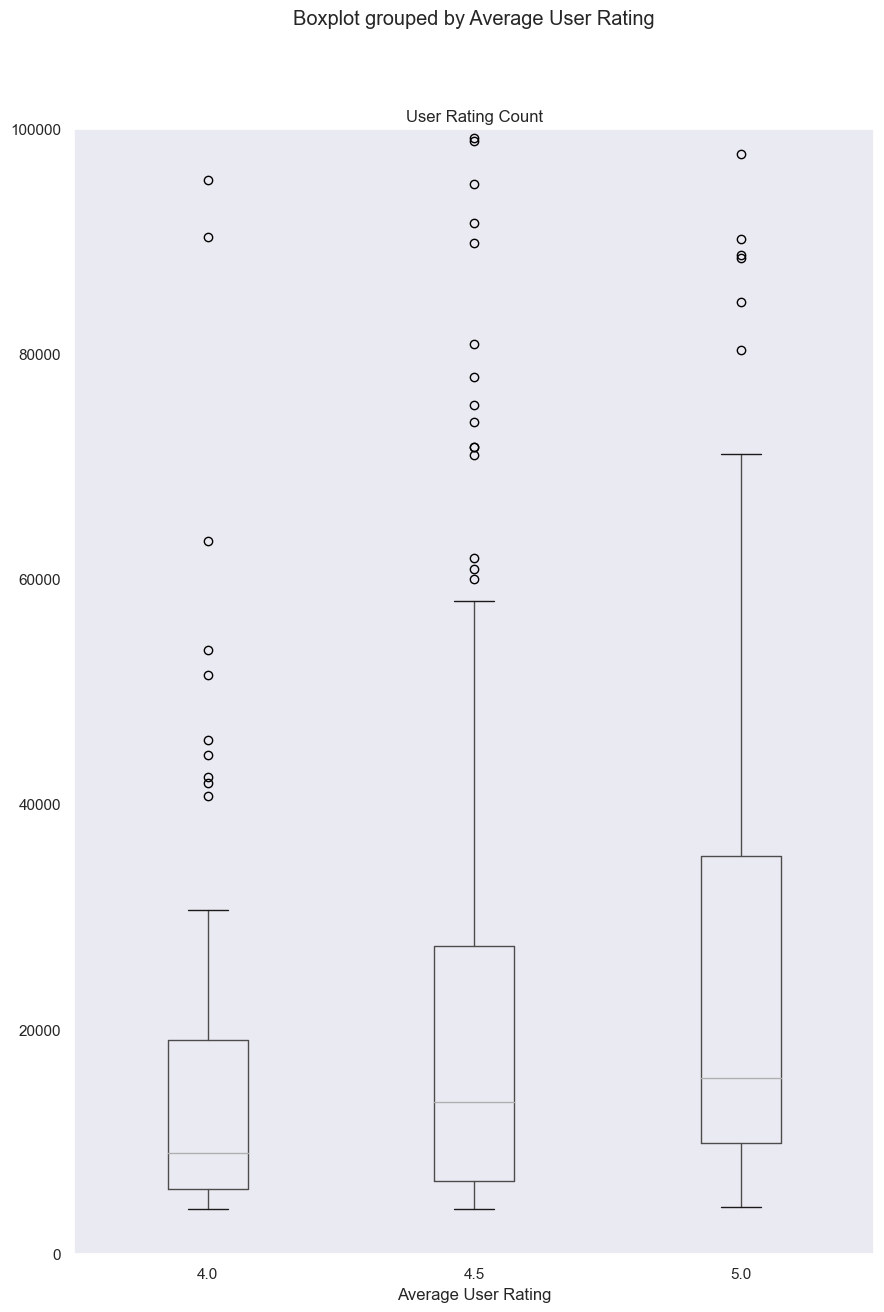

In [34]:
fig, ax = plt.subplots(figsize=(10,15))
games_clean.boxplot(by='Average User Rating', column=['User Rating Count'], grid=False, ax=ax)
#shows the whole boxplot inc. the very outliers
#ax.set_ylim(0, 3500000) # set the y-axis limits

#limit the y-axis so that the boxplot is shown better
ax.set_ylim(0, 100000) 
plt.show()

In [35]:
avgecount = games_clean.groupby("Average User Rating")["User Rating Count"].describe()
avgecount

,count,mean,std,min,25%,50%,75%,max
Average User Rating,,,,,,,,
4.0,84.0,24485.202381,36835.921075,4027.0,5772.25,8969.0,19052.00,193923.0
4.5,334.0,44707.910180,189381.860845,4025.0,6471.25,13505.0,27426.75,3032734.0
5.0,90.0,35783.600000,52601.217015,4167.0,9870.00,15696.5,35400.00,374772.0


### Analysis 

- The vast majority of games considered to be successful have an average user rating of 4.5
- A positive correlation exists, where the median user rating count increases as the average user rating increases. This suggests that the more popular a game, the higher its ratings tend to be


### Free vs Paid Games

In [36]:
# create new df of user count n ori release date
freepaid = games_clean[["User Rating Count", "Average User Rating", "Price", "In-app Purchases", "Age Rating"]].copy()
freepaid = freepaid.rename(columns ={'User Rating Count': 'count', 'Average User Rating': 'rating', 'In-app Purchases': 'addons', 'Age Rating': 'age'})
freepaid['addons'] = freepaid['addons'].fillna('No').map(lambda x: 'Yes' if x != 'No' else 'No')
freepaid['pricetype'] = freepaid['Price'].apply(lambda x: 0 if x == 0.0 else 1)
freepaid['logcount'] = np.log10(freepaid['count'])


freepaid

,count,rating,Price,addons,age,pricetype,logcount
0,3032734.0,4.5,0.00,Yes,9+,0,6.481834
1,1277095.0,4.5,0.00,Yes,9+,0,6.106223
2,711409.0,4.5,0.00,Yes,17+,0,5.852119
3,469562.0,4.5,0.00,Yes,9+,0,5.671693
4,400787.0,4.5,0.00,Yes,9+,0,5.602914
...,...,...,...,...,...,...,...
503,4067.0,4.5,0.99,Yes,12+,1,3.609274
504,4027.0,4.5,0.00,Yes,9+,0,3.604982
505,4027.0,4.0,0.00,Yes,12+,0,3.604982
506,4027.0,4.0,0.00,Yes,12+,0,3.604982


In [37]:
# Create Seperate df of free and paid games
# create a boolean mask for the "free" prices
bfree = (freepaid["pricetype"] == 0)

# create a new dataframe for free games
free = freepaid[bfree]

# create a boolean mask for the "paid" prices
bpaid = (freepaid["pricetype"] == 1)

# create a new dataframe for paid games
paid = freepaid[bpaid]


#### User Rating Count vs Age Rating

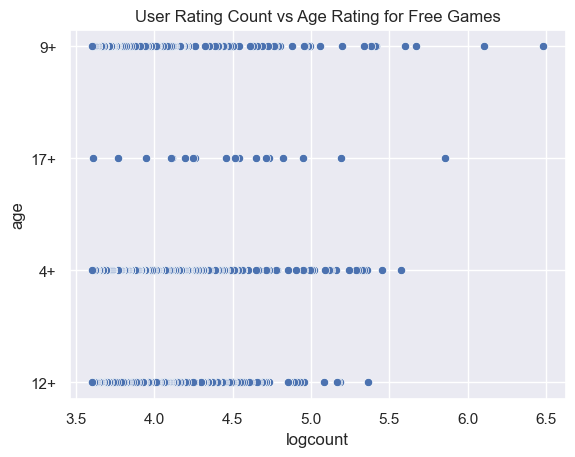

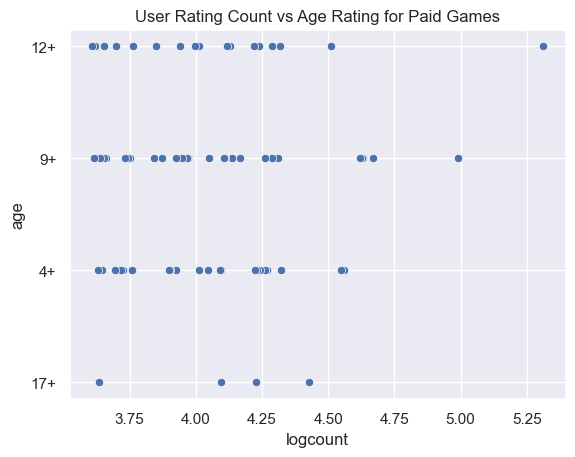

In [38]:
# plot user rating count vs age rating for free games
sb.scatterplot(data=free, x='logcount', y='age')
plt.title('User Rating Count vs Age Rating for Free Games')
plt.show()

# plot user rating count vs age rating for paid games
sb.scatterplot(data=paid, x='logcount', y='age')
plt.title('User Rating Count vs Age Rating for Paid Games')
plt.show()


### Analysis:
- for both price types, not many games have the age rating of 17+
- for both price types, games with 9+ age rating have a higher user rating 


#### User Rating count vs Add-ons

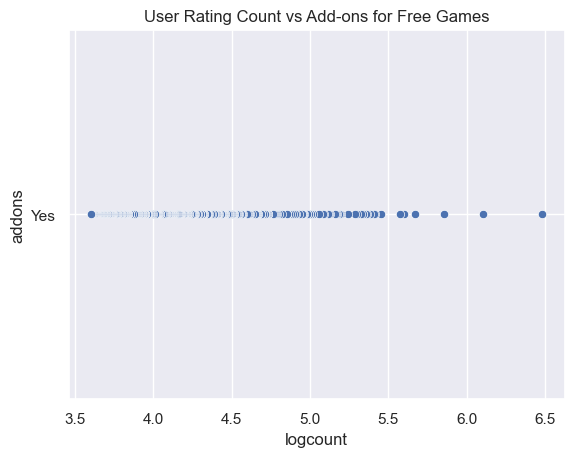

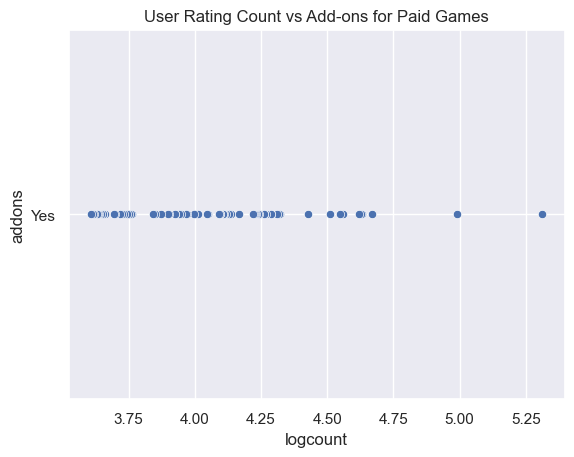

In [39]:
# plot user rating count vs add ons  for free games
sb.scatterplot(data=free, x='logcount', y='addons')
plt.title('User Rating Count vs Add-ons for Free Games')
plt.show()

# plot user rating count vs add-ons rating for paid games
sb.scatterplot(data=paid, x='logcount', y='addons')
plt.title('User Rating Count vs Add-ons for Paid Games')
plt.show()


### Analysis:
- Both free and paid games within the “successful” game dataset all have add-ons to their game

#### User Rating Count vs Average User Rating

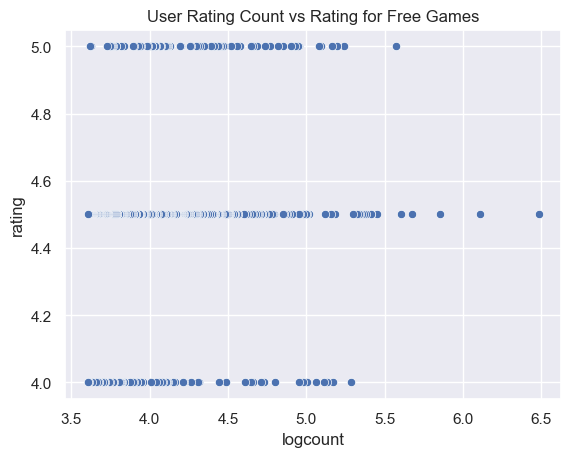

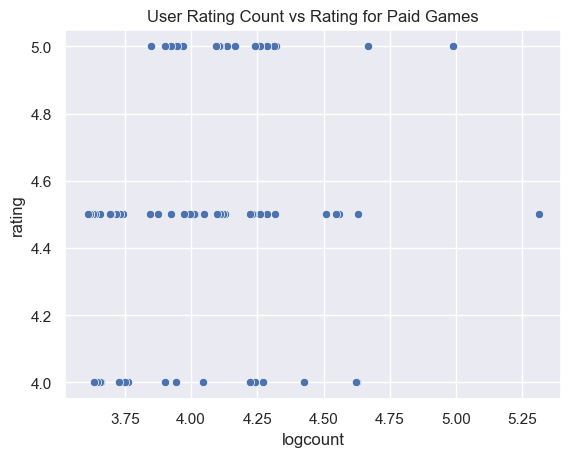

In [40]:
# plot user rating count vs age rating for free games
sb.scatterplot(data=free, x='logcount', y='rating')
plt.title('User Rating Count vs Rating for Free Games')
plt.show()

# plot user rating count vs age rating for paid games
sb.scatterplot(data=paid, x='logcount', y='rating')
plt.title('User Rating Count vs Rating for Paid Games')
plt.show()


### Analysis

- In terms of porportions, there exists more free games with an average user rating oif 4.5 and above, as compared to paid games
- This suggests that a free game is more likely to perform in comparison to a paid one

# Linear Regression

In [67]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# Extract Response and Predictors
y = pd.DataFrame(games_full["User Rating Count"])
X = pd.DataFrame(games_full[["Price" ]]) 



# Split the price and user rating Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Linear Regression using Train Data
model = LinearRegression().fit(X_train, y_train)

# Predict User Rating Count corresponding to Price
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("R-squared \t\t:", model.score(X_train, y_train))
print("Mean Squared Error \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error \t:", mean_absolute_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("R-squared \t\t:", model.score(X_test, y_test))
print("Mean Squared Error \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error \t:", mean_absolute_error(y_test, y_test_pred))
print()

Train Set : (12755, 1) (12755, 1)
Test Set  : (4252, 1) (4252, 1)
Goodness of Fit of Model 	Train Dataset
R-squared 		: 1.2753376099072788e-05
Mean Squared Error 	: 853929139.86741
Mean Absolute Error 	: 2624.8417454233763

Goodness of Fit of Model 	Test Dataset
R-squared 		: 1.4898149892861312e-05
Mean Squared Error 	: 633893409.7003549
Mean Absolute Error 	: 2708.98861687689



### Analysis

- The correlation between price and average user rating is bad, and there is little corrrelation between the two
- As such, we chose to utilise a degree of the initial determining factors as predictors for our classification tree and our random forest classifier

# MultiVariate Classification Tree to determine success

In [44]:
games_full [['User Rating Count', 'Price']] = games_full [['User Rating Count', 'Price']].fillna(0)

Train Set : (12755, 1) (12755, 2)
Test Set  : (4252, 1) (4252, 2)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9957663661309291

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9971777986829727



<AxesSubplot:>

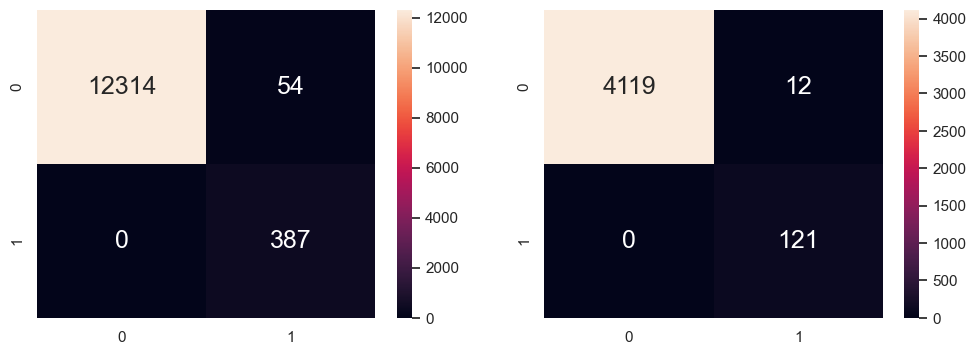

In [45]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.375, 0.875, 'User Rating Count <= 3993.5\ngini = 0.059\nsamples = 12755\nvalue = [12368, 387]\nclass = 0'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 12313\nvalue = [12313, 0]\nclass = 0'),
 Text(0.5, 0.625, 'User Rating Count <= 182492.5\ngini = 0.218\nsamples = 442\nvalue = [55, 387]\nclass = 1'),
 Text(0.25, 0.375, 'Price <= 4.49\ngini = 0.208\nsamples = 424\nvalue = [50, 374]\nclass = 1'),
 Text(0.125, 0.125, 'gini = 0.216\nsamples = 406\nvalue = [50, 356]\nclass = 1'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = 1'),
 Text(0.75, 0.375, 'User Rating Count <= 192158.5\ngini = 0.401\nsamples = 18\nvalue = [5, 13]\nclass = 1'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.875, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = 1')]

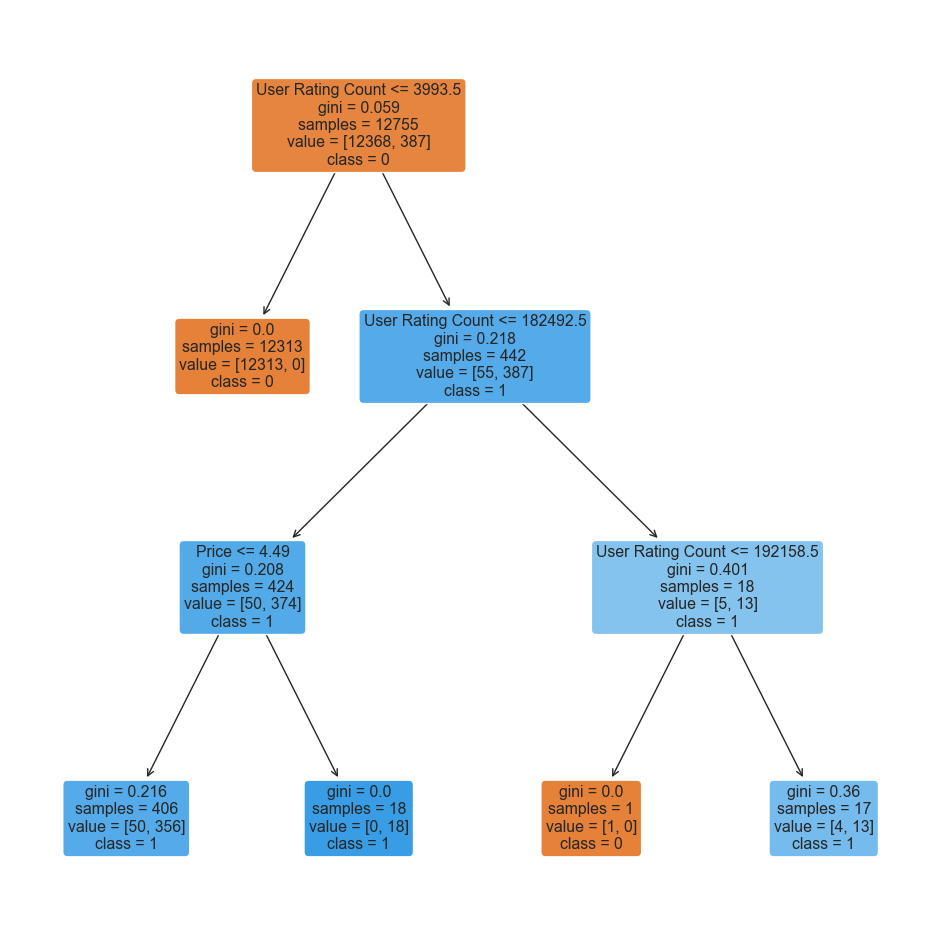

In [46]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier



# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

In [47]:
from sklearn.model_selection import train_test_split


acc_decision_tree = round(dectree.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_decision_tree, 2), "%")

acc_decision_tree = round(dectree.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_decision_tree, 2), "%")

Train accuracy: 99.58 %
Test accuracy: 99.72 %


### Analysis

- The existing decision tree is shown to be highly accurate, because "User Rating Count" is utilised as a predictor. As "User Rating Count" was initially one of the conditions used to determine whether a game is considered to be successful
- As the majority of the variables in the dataset with correlations with a game's success were categorical, we were ultimately only able to utilise 2 predictors in this decision tree

# Random Forest

In [48]:
games_full_split = games_full[['Name', 'User Rating Count', 'Price', 'Age Rating', 'Genres', 'success']]

# Split the categories in each cell using a delimiter (comma in this example)
games_full_split['Genres'] = games_full_split['Genres'].str.split(', ')

# Perform one hot encoding using pandas
one_hot = pd.get_dummies(pd.DataFrame(games_full_split['Genres'].tolist()).stack()).sum(level=0)

# Combine the one hot encoded variables with the original DataFrame
games_full_split = pd.concat([games_full_split, one_hot], axis=1)

# Drop the original categorical variable
games_full_split = games_full_split.drop('Genres', axis=1)

games_full_split


,Name,User Rating Count,Price,Age Rating,success,Action,Adventure,Animals & Nature,Art,Board,...,Social Networking,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word
0,Clash of Clans,3032734.0,0.0,9+,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Clash Royale,1277095.0,0.0,9+,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,PUBG MOBILE,711409.0,0.0,17+,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Plants vs. Zombies\u2122 2,469562.0,0.0,9+,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Pok\xe9mon GO,439776.0,0.0,9+,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,Stack Puzzle : Rise Tower,0.0,0.0,4+,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17003,EachOther,0.0,0.0,4+,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17004,Rabbit Vs Tortoise,0.0,0.0,4+,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17005,FaTaLL,0.0,0.0,4+,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:


# Perform one hot encoding using pandas
one_hot = pd.get_dummies(games_full_split['Age Rating'])

# Combine the one hot encoded variables with the original DataFrame
games_full_split = pd.concat([games_full_split, one_hot], axis=1)

# Drop the original categorical variable
games_full_split = games_full_split.drop('Age Rating', axis=1)

games_full_split


,Name,User Rating Count,Price,success,Action,Adventure,Animals & Nature,Art,Board,Books,...,Strategy,Travel,Trivia,Utilities,Weather,Word,12+,17+,4+,9+
0,Clash of Clans,3032734.0,0.0,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Clash Royale,1277095.0,0.0,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,PUBG MOBILE,711409.0,0.0,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,Plants vs. Zombies\u2122 2,469562.0,0.0,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Pok\xe9mon GO,439776.0,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,Stack Puzzle : Rise Tower,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
17003,EachOther,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
17004,Rabbit Vs Tortoise,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
17005,FaTaLL,0.0,0.0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [50]:


# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(games_full_split['success'])
X = pd.DataFrame(games_full_split.drop(['success', 'Name'], axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Length")
print(f"X_train:\t {len(X_train)}")
print(f"X_test: \t {len(X_test)}")
print(f"y_train:\t {len(y_train)}")
print(f"y_test: \t {len(y_test)}")

Length
X_train:	 11904
X_test: 	 5103
y_train:	 11904
y_test: 	 5103


In [51]:
X_train.head(3)

,User Rating Count,Price,Action,Adventure,Animals & Nature,Art,Board,Books,Business,Card,...,Strategy,Travel,Trivia,Utilities,Weather,Word,12+,17+,4+,9+
3576,53.0,0.00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8106,0.0,3.99,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
13810,0.0,0.00,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [52]:
y_train.head(3)


,success
3576,0.0
8106,0.0
13810,0.0


In [53]:
# Random Forest
random_forest_v1 = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest_v1.fit(X_train, y_train)

y_pred = random_forest_v1.predict(X_test)

random_forest_v1.score(X_train, y_train)
acc_random_forest_v1 = round(random_forest_v1.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest_v1, 2), "%")


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of {random_forest_v1} is {acc}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix of {random_forest_v1} is {cm}")

100.0 %
Accuracy of RandomForestClassifier(oob_score=True) is 0.9939251420732902
Confusion Matrix of RandomForestClassifier(oob_score=True) is [[4936   17]
 [  14  136]]


In [54]:
acc_random_forest_v1 = round(random_forest_v1.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_random_forest_v1, 2), "%")

acc_random_forest_v1 = round(random_forest_v1.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_random_forest_v1, 2), "%")

Train accuracy: 100.0 %
Test accuracy: 99.39 %


In [55]:
scores = cross_val_score(random_forest_v1, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99370013 0.9949601  0.99370013 0.99412012 0.99537815]
Mean: 0.9943717243302193
Standard Deviation: 0.000681832328769107


-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.9947917865172109
True Positive Rate: 0.9021739130434783
True Negative Rate: 0.9977461858529819

Precision: 0.9021739130434783
Recall: 0.9273743016759777
f1_score: 0.9146005509641874


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.99314205603887
True Positive Rate: 0.8758169934640523
True Negative Rate: 0.9967676767676767

Precision: 0.8758169934640523
Recall: 0.8933333333333333
f1_score: 0.8844884488448845


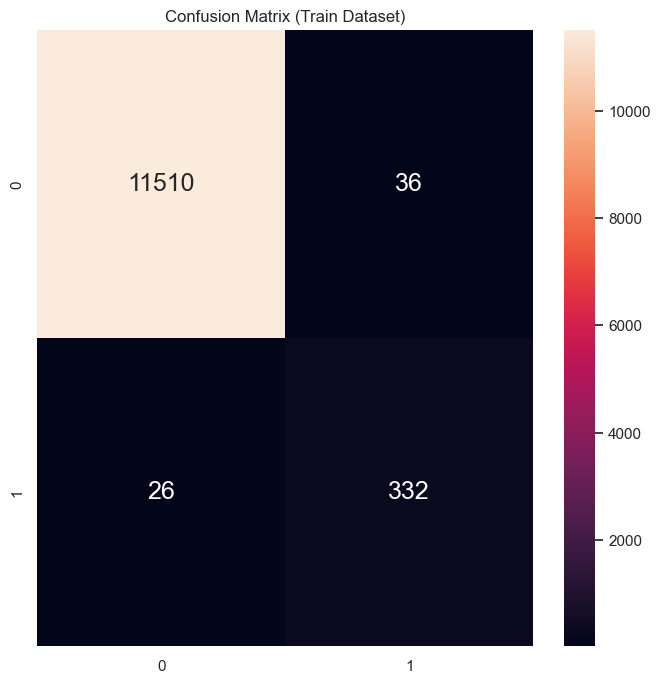

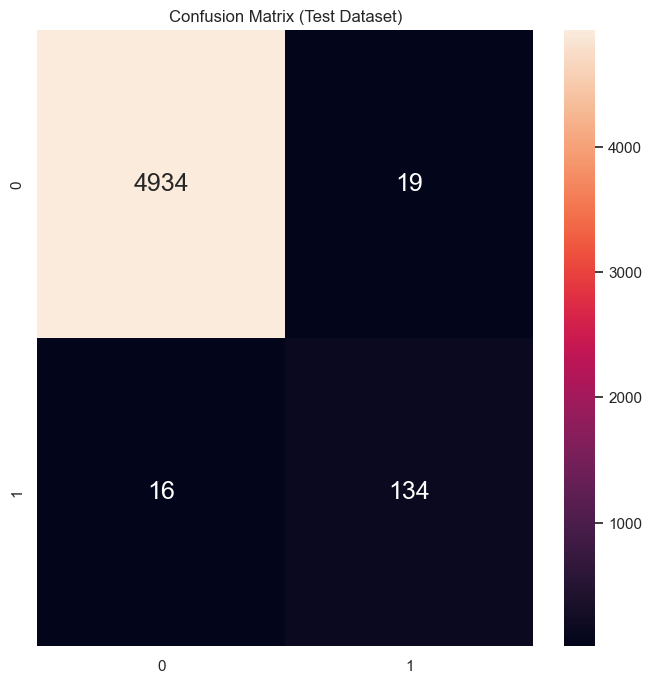

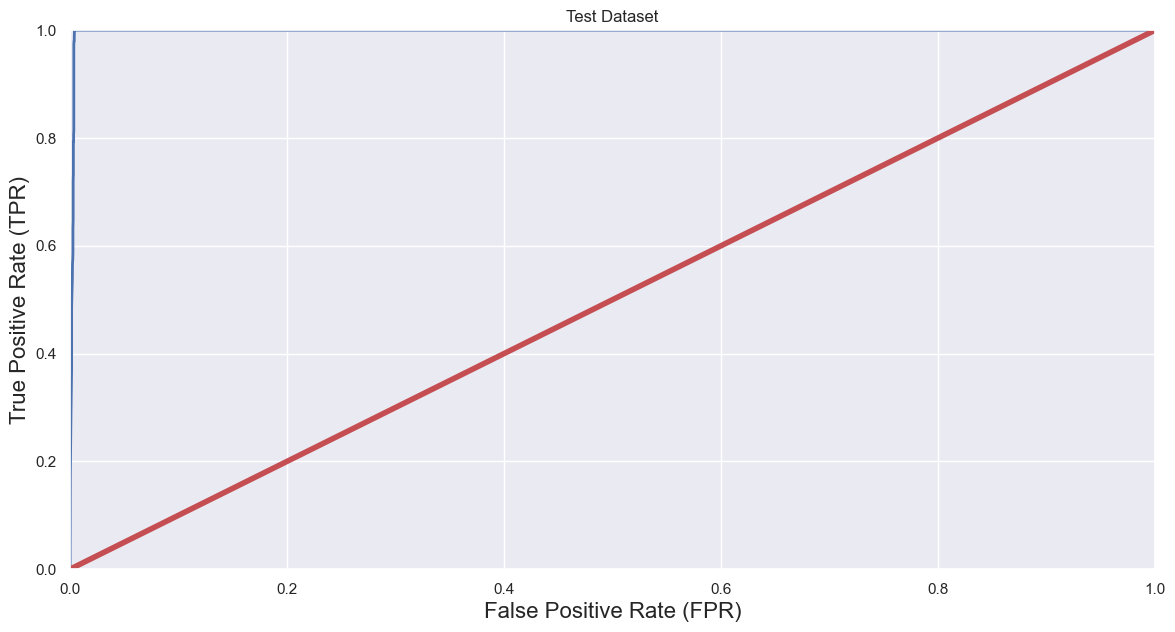

ROC-AUC-Score: 0.9981667676155864
-----

oob score: 99.5 %


In [56]:
def confusion_matrix_TPR_TNR(y, y_pred, scores, train_test_string):
    from sklearn.metrics import confusion_matrix
    
    # Confusion Matrix
    c_matrix = confusion_matrix(y, y_pred)

    # True Negatives & True Positives
    TN = c_matrix[0][0]
    FP = c_matrix[1][0]
    FN = c_matrix[0][1]
    TP = c_matrix[1][1]

    # True Positive Rate and True Negative Rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)

    # Check the Goodness of Fit (on Train Data)
    print(f"Goodness of Fit of Model ({train_test_string} Dataset)")
    print("Classification Accuracy:", scores.mean())
    print("True Positive Rate:", TPR)
    print("True Negative Rate:", TNR)

    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 8))
    sb.heatmap(c_matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix ({train_test_string} Dataset)")
    print()
    
def model_performance(random_forest, X_train, X_test, y_train, y_test):
    # Import libraries
    from sklearn.model_selection import cross_val_predict
    from sklearn.model_selection import cross_val_score
    
    # K-Fold Cross Validation
    y_train_pred = cross_val_predict(random_forest, X_train, y_train, cv=5)
    y_test_pred = cross_val_predict(random_forest, X_test, y_test, cv=5)
    
    train_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring = "accuracy")
    test_scores = cross_val_score(random_forest, X_test, y_test, cv=5, scoring = "accuracy")
    
    # Performance metrics
    #confusion_matrix_TPR_TNR(y_train, y_test, y_train_pred, y_test_pred, train_scores, test_scores)
    
    
    
    print("-> Train Dataset")
    confusion_matrix_TPR_TNR(y_train, y_train_pred, train_scores, "Train")
    get_precision_recall(y_train, y_train_pred)
    get_f1_score(y_train, y_train_pred)

    print("\n\n-----\n-> Test Dataset")
    confusion_matrix_TPR_TNR(y_test, y_test_pred, test_scores, "Test")
    get_precision_recall(y_test, y_test_pred)
    get_f1_score(y_test, y_test_pred)
    ROC_AUC(random_forest, X_test, y_test, "Test")
    print('-----\n')
    
    try:
        get_oob_score(random_forest)
    except:
        pass
    
def get_precision_recall(y, y_pred):
    from sklearn.metrics import precision_score, recall_score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    
    return [precision, recall]

def get_f1_score(y, y_pred):
    from sklearn.metrics import f1_score
    
    f1 = f1_score(y, y_pred)
    
    print("f1_score:", f1)
    
    return f1

def get_oob_score(random_forest):
    print("oob score:", round(random_forest.oob_score_ * 100, 2), "%")
    
def ROC_AUC(random_forest, X_train, y_train, train_test):
    try:
        # getting the probabilities of our predictions
        y_scores = random_forest.predict_proba(X_train)
        y_scores = y_scores[:,1]

        from sklearn.metrics import roc_curve
        # compute true positive rate and false positive rate
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

        # plotting them against each other
        def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
            plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
            plt.plot([0, 1], [0, 1], 'r', linewidth=4)
            plt.axis([0, 1, 0, 1])
            plt.xlabel('False Positive Rate (FPR)', fontsize=16)
            plt.ylabel('True Positive Rate (TPR)', fontsize=16)
            plt.title(f'{train_test} Dataset')

        plt.figure(figsize=(14, 7))
        plot_roc_curve(false_positive_rate, true_positive_rate)
        plt.show()


        # ROC AUC Score
        from sklearn.metrics import roc_auc_score
        r_a_score = roc_auc_score(y_train, y_scores)
        print("ROC-AUC-Score:", r_a_score)
    except:
        pass

model_performance(random_forest_v1, X_train, X_test, y_train, y_test)

### Analysis

- The Random Forest Classifier is moderately accurate in the prediction of a game's sucess, with classification accuracy of 0.993. 
- This could also be the result of the utilisation of user rating count as a predictor, which was an intial determining factor in a game's success